In [1]:
import pandas as pd 
import numpy as np 

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../DATA/all_season_summary.csv')

### EDA

In [3]:
df.head()

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,away_score,winner,result,start_date,end_date,venue_id,venue_name,home_captain,away_captain,pom,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2023.0,1359475,Gujarat Titans v Chennai Super Kings,GT v CSK,"1st Match (N), Indian Premier League at Ahmeda...",GT,CSK,GT,BOWL FIRST,178/7,182/5,182/5,178/7,GT,Titans won by 5 wkts (4b rem),2023-03-31T14:00Z,2023-04-01T23:59Z,57851,"Narendra Modi Stadium, Motera, Ahmedabad",Hardik Pandya,MS Dhoni,Rashid Khan,"Gujarat Titans 2, Chennai Super Kings 0",False,19.2,182.0,5.0,23.0,20.0,178.0,7.0,23.0,"Gill, Rashid lead defending champions Gujarat ...","Shubman Gill,Vijay Shankar","Rashid Khan,Mohammed Shami","Wriddhiman Saha (WK),Shubman Gill (UKN),Sai Su...","Devon Conway (UKN),Ruturaj Gaikwad (UKN),Moeen...","Ruturaj Gaikwad,Moeen Ali","Rajvardhan Hangargekar,Ravindra Jadeja",31 March 2023 - night match (20-over match),Saiyed Khalid,Nitin Menon,Virender Sharma,Javagal Srinath,Abhijit Bengeri
1,2023.0,1359476,Punjab Kings v Kolkata Knight Riders,PBKS v KKR,"2nd Match (D/N), Indian Premier League at Chan...",PBKS,KKR,KKR,BOWL FIRST,191/5,146/7,191/5,146/7,PBKS,Punjab Kings won by 7 runs (DLS),2023-04-01T10:00Z,2023-04-02T23:59Z,57991,"Punjab Cricket Association IS Bindra Stadium, ...",Shikhar Dhawan,Nitish Rana,Arshdeep Singh,"Punjab Kings 2, Kolkata Knight Riders 0",False,20.0,191.0,5.0,26.0,16.0,146.0,7.0,20.0,"Arshdeep, Rajapaksa lead Punjab Kings to victo...","Bhanuka Rajapaksa,Shikhar Dhawan","Arshdeep Singh,Rahul Chahar","Prabhsimran Singh (UKN),Shikhar Dhawan (UKN),B...","Mandeep Singh (AR),Rahmanullah Gurbaz (WK),Anu...","Andre Russell,Venkatesh Iyer","Tim Southee,Varun Chakravarthy",01 April 2023 - day/night match (20-over match),Yeshwant Barde,Bruce Oxenford,Jayaraman Madanagopal,Manu Nayyar,Pranav Joshi
2,2023.0,1359477,Lucknow Super Giants v Delhi Capitals,LSG v DC,"3rd Match (N), Indian Premier League at Luckno...",LSG,DC,DC,BOWL FIRST,193/6,143/9,193/6,143/9,LSG,Super Giants won by 50 runs,2023-04-01T14:00Z,2023-04-02T23:59Z,1070094,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,KL Rahul,David Warner,Mark Wood,"Lucknow Super Giants 2, Delhi Capitals 0",False,20.0,193.0,6.0,21.0,20.0,143.0,9.0,17.0,"Wood five-for, Mayers 73 stud Super Giants' wi...","Kyle Mayers,Nicholas Pooran","Mark Wood,Avesh Khan","KL Rahul (UKN),Kyle Mayers (AR),Deepak Hooda (...","Prithvi Shaw (UKN),David Warner (UKN),Mitchell...","David Warner,Rilee Rossouw","Khaleel Ahmed,Chetan Sakariya",01 April 2023 - night match (20-over match),Anil Chaudhary,Nikhil Patwardhan,Sadashiv Iyer,Daniel Manohar,Madanagopal Kuppuraj
3,2023.0,1359478,Sunrisers Hyderabad v Rajasthan Royals,SRH v RR,"4th Match (D/N), Indian Premier League at Hyde...",SRH,RR,SRH,BOWL FIRST,203/5,131/8,131/8,203/5,RR,Royals won by 72 runs,2023-04-02T10:00Z,2023-04-03T23:59Z,58142,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Bhuvneshwar Kumar,Sanju Samson,Jos Buttler,"Rajasthan Royals 2, Sunrisers Hyderabad 0",False,20.0,131.0,8.0,13.0,20.0,203.0,5.0,29.0,Buttler and Boult trigger demolition of Sunris...,"Abdul Samad,Mayank Agarwal","T Natarajan,Fazalhaq Farooqi","Abhishek Sharma (AR),Mayank Agarwal (UKN),Rahu...","Yashasvi Jaiswal (UKN),Jos Buttler (UKN),Sanju...","Sanju Samson,Yashasvi Jaiswal","Yuzvendra Chahal,Trent Boult",02 April 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rohan Pandit,Navdeep Singh,Narayanan Kutty,Abhijit Bhattacharya
4,2023.0,1359479,Royal Challengers Bangalore v Mumbai Indians,RCB v MI,"5th Match (N), Indian Premier League at Bengal...",RCB,MI,RCB,BOWL FIRST,171/7,172/2,172/2,171/7,RCB,RCB won by 8 wkts (22b rem),2023-04-02T14:00Z,2023-04-03T23:5

In [4]:
df.columns


Index(['season', 'id', 'name', 'short_name', 'description', 'home_team',
       'away_team', 'toss_won', 'decision', '1st_inning_score',
       '2nd_inning_score', 'home_score', 'away_score', 'winner', 'result',
       'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain',
       'away_captain', 'pom', 'points', 'super_over', 'home_overs',
       'home_runs', 'home_wickets', 'home_boundaries', 'away_overs',
       'away_runs', 'away_wickets', 'away_boundaries', 'highlights',
       'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1',
       'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1',
       'umpire2', 'tv_umpire', 'referee', 'reserve_umpire'],
      dtype='object')

* column names are already standardized.

In [5]:
# cols_of_interest = ['season', 'name', 'description', 'home_team', 'away_team',]

mdf = df.copy()

mdf['output'] = (mdf['home_team'] == mdf['winner']).astype(int)
mdf['run_rate'] = mdf['home_runs'] / mdf['home_overs']
mdf['bowl_econ'] = mdf['away_runs'] / mdf['away_overs']
 

In [6]:
def gen_ELO(df):
    df = df.sort_values('start_date')  # Ensure time order

    # Dictionary storing current Elo ratings for each team
    current_ratings = {}

    def get_rating(team):
        # Default to 1500 if the team isn't in our dict yet
        return current_ratings.get(team, 1500)

    K = 20
    updated_rows = []
    for idx, row in df.iterrows():
        teamA = row['home_team']
        teamB = row['away_team']
        S_A = row['output']  # 1 if A wins, 0 if B wins, 0.5 tie

        R_A = get_rating(teamA)
        R_B = get_rating(teamB)

        # Expected score for Team A
        E_A = 1 / (1 + 10 ** ((R_B - R_A) / 400))

        # Update both teams
        R_A_new = R_A + K * (S_A - E_A)
        R_B_new = R_B + K * ((1 - S_A) - (1 - E_A))

        # Store the new ratings
        current_ratings[teamA] = R_A_new
        current_ratings[teamB] = R_B_new

        # Optionally add to the row’s data
        row['elo_home_before'] = R_A
        row['elo_away_before'] = R_B
        row['elo_home_after'] = R_A_new
        row['elo_away_after'] = R_B_new
        updated_rows.append(row)

    # Create a new DataFrame with updated rating info
    df_updated = pd.DataFrame(updated_rows)
    return df_updated


In [7]:
mdf = gen_ELO(mdf)
mdf[mdf.home_team == 'RCB']

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,away_score,winner,result,start_date,end_date,venue_id,venue_name,home_captain,away_captain,pom,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire,output,run_rate,bowl_econ,elo_home_before,elo_away_before,elo_home_after,elo_away_after
973,2008.0,335982,Royal Challengers Bangalore v Kolkata Knight R...,RCB v KKR,"1st match (N), Indian Premier League at Bengal...",RCB,KKR,RCB,BOWL FIRST,222/3,82,82,222/3,KKR,KKR won by 140 runs,2008-04-18T14:30Z,2008-04-20T23:59Z,57897,"M.Chinnaswamy Stadium, Bengaluru",Rahul Dravid,Sourav Ganguly,Brendon McCullum,"Kolkata Knight Riders 2, Royal Challengers Ban...",False,15.1,82.0,10.0,6.0,20.0,222.0,3.0,29.0,McCullum's record 158 leads rout. In what was ...,"Praveen Kumar,Ashley Noffke","Zaheer Khan,Ashley Noffke","Rahul Dravid (BT),Wasim Jaffer (BT),Virat Kohl...","Sourav Ganguly (UKN),Brendon McCullum (BT),Ric...","Brendon McCullum,Ricky Ponting","Ajit Agarkar,Ashok Dinda",18 April 2008 - night match (20-over match),Asad Rauf,Rudi Koertzen,Amiesh Saheba,Javagal Srinath,Vinayak Kulkarni,0,5.430464,11.100000,1500.000000,1500.000000,1490.000000,1510.000000
984,2008.0,335992,Royal Challengers Bangalore v Rajasthan Royals,RCB v RR,"12th match (N), Indian Premier League at Benga...",RCB,RR,RR,BOWL FIRST,135/8,138/3,135/8,138/3,RR,Royals won by 7 wickets (with 17 balls remaining),2008-04-26T14:30Z,2008-04-28T23:59Z,57897,"M.Chinnaswamy Stadium, Bengaluru",Rahul Dravid,Shane Warne,Shane Watson,"Rajasthan Royals 2, Royal Challengers Bangalore 0",False,20.0,135.0,8.0,19.0,17.1,138.0,3.0,24.0,Watson stars in thumping Rajasthan win. Rajast...,"Ross Taylor,Praveen Kumar","Zaheer Khan,Sunil Joshi","Shivnarine Chanderpaul (BT),Rahul Dravid (BT),...","Graeme Smith (BT),Mahesh Rawat (WK),Yusuf Path...","Shane Watson,Graeme Smith","Shane Watson,Munaf Patel",26 April 2008 - night match (20-over match),Mark Benson,Ian Howell,GA Pratapkumar,Javagal Srinath,Shavir Tarapore,0,6.750000,8.070175,1500.287744,1509.449505,1490.551379,1519.185870
987,2008.0,335996,Royal Challengers Bangalore v Chennai Super Kings,RCB v CSK,"15th match (N), Indian Premier League at Benga...",RCB,CSK,CSK,BAT FIRST,178/5,165,165,178/5,CSK,Super Kings won by 13 runs,2008-04-28T14:30Z,2008-04-30T23:59Z,57897,"M.Chinnaswamy Stadium, Bengaluru",Rahul Dravid,MS Dhoni,MS Dhoni,"Chennai Super Kings 2, Royal Challengers Banga...",False,19.4,165.0,10.0,19.0,20.0,178.0,5.0,25.0,Dhoni scripts narrow Chennai win. The Chennai ...,"Ross Taylor,Wasim Jaffer","Zaheer Khan,Praveen Kumar","Bharat Chipli (BT),Wasim Jaffer (BT),Ross Tayl...","Parthiv Patel (BT),Matthew Hayden (BT),Michael...","MS Dhoni,Michael Hussey","Manpreet Gony,Joginder Sharma",28 April 2008 - night match (20-over match),Russell Tiffin,Billy Doctrove,Krishna Hariharan,Javagal Srinath,NaN,0,8.505155,8.900000,1490.551379,1529.425240,1481.665613,1538.311006
993,2008.0,336034,Royal Challengers Bangalore v Deccan Chargers,RCB v DC,"21st match (D/N), Indian Premier League at Ben...",RCB,SRH,SRH,BOWL FIRST,156/8,153/6,156/8,153/6,RCB,RCB won by 3 runs,2008-05-03T10:30Z,2008-05-05T23:59Z,57897,"M.Chinnaswamy Stadium, Bengaluru",Rahul Dravid,VVS Laxman,Praveen Kumar,"Royal Challengers Bangalore 2, Deccan Chargers 0",False,20.0,156.0,8.0,19.0,20.0,153.0,6.0,20.0,Bangalore fight back to clinch thriller. In a ...,"Wasim Jaffer,Virat Kohli","Praveen Kumar,Zaheer Khan","Bharat Chipli (BT),Wasim Jaffer (BT),Virat Koh...","Adam Gilchrist (WK),VVS Laxman (BT),Herschelle...","Rohit Sharma,VVS Laxman","RP Singh,Pragyan Ojha",3 May 2008 - day/night match (20-over match),Suresh Shastri,Billy Doctrove,Shavir Tarapore,Talat Ali,Nandan,1,7.800000,7.650000,1472.438965,14

In [8]:
def shift_and_roll_mean(df, group_col, value_col, new_col_name,
                        window=5, min_periods=1, fillna_val=0):
    """
    For the given 'value_col', do:
      1) Shift by 1 within each group.
      2) Rolling mean with the specified window.
      3) Create a new column with the result.
    """

    shifted = df.groupby(group_col)[value_col].shift(1)

    rolled = (
        shifted.groupby(df[group_col])
               .rolling(window=window, min_periods=min_periods)
               .mean()
    )
    df[new_col_name] = rolled.reset_index(level=0, drop=True)

    # Fill NaN for first matches
    df[new_col_name] = df[new_col_name].fillna(fillna_val)

    return df


In [9]:
def generate_new(my_df, team):
    my_df = my_df.sort_values(by=[
        team,
        'start_date'
    ])
    my_df = shift_and_roll_mean(my_df, team, 'home_runs', f'{team}_avg_runs_scored_last_5')
    my_df = shift_and_roll_mean(my_df, team, 'away_runs', f'{team}_avg_runs_conceded_last_5')
    my_df = shift_and_roll_mean(my_df, team, 'output', f'{team}_win_ratio_last_5')
    my_df = shift_and_roll_mean(my_df, team, 'run_rate', f'{team}_avg_run_rate_last_5')
    my_df = shift_and_roll_mean(my_df, team, 'bowl_econ', f'{team}_avg_bowl_econ_last_5')
    my_df = shift_and_roll_mean(my_df, team, 'home_boundaries', f'{team}_avg_boundaries_scored_last_5')
    my_df = shift_and_roll_mean(my_df, team, 'away_boundaries', f'{team}_avg_boundaries_conceded_last_5')
    return my_df

In [10]:
# Now shift+roll multiple columns
inter_df = generate_new(mdf, 'home_team')
inter_df[inter_df.home_team == 'RCB']


,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,away_score,winner,result,start_date,end_date,venue_id,venue_name,home_captain,away_captain,pom,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire,output,run_rate,bowl_econ,elo_home_before,elo_away_before,elo_home_after,elo_away_after,home_team_avg_runs_scored_last_5,home_team_avg_runs_conceded_last_5,home_team_win_ratio_last_5,home_team_avg_run_rate_last_5,home_team_avg_bowl_econ_last_5,home_team_avg_boundaries_scored_last_5,home_team_avg_boundaries_conceded_last_5
973,2008.0,335982,Royal Challengers Bangalore v Kolkata Knight R...,RCB v KKR,"1st match (N), Indian Premier League at Bengal...",RCB,KKR,RCB,BOWL FIRST,222/3,82,82,222/3,KKR,KKR won by 140 runs,2008-04-18T14:30Z,2008-04-20T23:59Z,57897,"M.Chinnaswamy Stadium, Bengaluru",Rahul Dravid,Sourav Ganguly,Brendon McCullum,"Kolkata Knight Riders 2, Royal Challengers Ban...",False,15.1,82.0,10.0,6.0,20.0,222.0,3.0,29.0,McCullum's record 158 leads rout. In what was ...,"Praveen Kumar,Ashley Noffke","Zaheer Khan,Ashley Noffke","Rahul Dravid (BT),Wasim Jaffer (BT),Virat Kohl...","Sourav Ganguly (UKN),Brendon McCullum (BT),Ric...","Brendon McCullum,Ricky Ponting","Ajit Agarkar,Ashok Dinda",18 April 2008 - night match (20-over match),Asad Rauf,Rudi Koertzen,Amiesh Saheba,Javagal Srinath,Vinayak Kulkarni,0,5.430464,11.100000,1500.000000,1500.000000,1490.000000,1510.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.0
984,2008.0,335992,Royal Challengers Bangalore v Rajasthan Royals,RCB v RR,"12th match (N), Indian Premier League at Benga...",RCB,RR,RR,BOWL FIRST,135/8,138/3,135/8,138/3,RR,Royals won by 7 wickets (with 17 balls remaining),2008-04-26T14:30Z,2008-04-28T23:59Z,57897,"M.Chinnaswamy Stadium, Bengaluru",Rahul Dravid,Shane Warne,Shane Watson,"Rajasthan Royals 2, Royal Challengers Bangalore 0",False,20.0,135.0,8.0,19.0,17.1,138.0,3.0,24.0,Watson stars in thumping Rajasthan win. Rajast...,"Ross Taylor,Praveen Kumar","Zaheer Khan,Sunil Joshi","Shivnarine Chanderpaul (BT),Rahul Dravid (BT),...","Graeme Smith (BT),Mahesh Rawat (WK),Yusuf Path...","Shane Watson,Graeme Smith","Shane Watson,Munaf Patel",26 April 2008 - night match (20-over match),Mark Benson,Ian Howell,GA Pratapkumar,Javagal Srinath,Shavir Tarapore,0,6.750000,8.070175,1500.287744,1509.449505,1490.551379,1519.185870,82.000000,222.000000,0.00,5.430464,11.100000,6.000000,29.0
987,2008.0,335996,Royal Challengers Bangalore v Chennai Super Kings,RCB v CSK,"15th match (N), Indian Premier League at Benga...",RCB,CSK,CSK,BAT FIRST,178/5,165,165,178/5,CSK,Super Kings won by 13 runs,2008-04-28T14:30Z,2008-04-30T23:59Z,57897,"M.Chinnaswamy Stadium, Bengaluru",Rahul Dravid,MS Dhoni,MS Dhoni,"Chennai Super Kings 2, Royal Challengers Banga...",False,19.4,165.0,10.0,19.0,20.0,178.0,5.0,25.0,Dhoni scripts narrow Chennai win. The Chennai ...,"Ross Taylor,Wasim Jaffer","Zaheer Khan,Praveen Kumar","Bharat Chipli (BT),Wasim Jaffer (BT),Ross Tayl...","Parthiv Patel (BT),Matthew Hayden (BT),Michael...","MS Dhoni,Michael Hussey","Manpreet Gony,Joginder Sharma",28 April 2008 - night match (20-over match),Russell Tiffin,Billy Doctrove,Krishna Hariharan,Javagal Srinath,NaN,0,8.505155,8.900000,1490.551379,1529.425240,1481.665613,1538.311006,108.500000,180.000000,0.00,6.090232,9.585088,12.500000,26.5
993,2008.0,336034,Royal Challengers Bangalore v Deccan Chargers,RCB v DC,"21st match (D/N), Indian Premier League at Ben...",RCB,SRH,SRH,BOWL FIRST,156/8,153/6,156/8,153/6,RCB,RCB won by 3 runs,2008-05-03T10:30Z,2008-05-05T23:59Z,57897,"M.Chinnaswamy Stadium, Bengaluru",Rahul Dravid,VVS Laxman,Praveen Kumar,"Royal Challengers Bangalore 2, Deccan Chargers 0",False,20.0,156.0,8.0,19.0,20.0,153.0,6

In [11]:
proc_df = generate_new(inter_df, 'away_team')
proc_df[proc_df.away_team == 'RCB']


,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,away_score,winner,result,start_date,end_date,venue_id,venue_name,home_captain,away_captain,pom,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire,output,run_rate,bowl_econ,elo_home_before,elo_away_before,elo_home_after,elo_away_after,home_team_avg_runs_scored_last_5,home_team_avg_runs_conceded_last_5,home_team_win_ratio_last_5,home_team_avg_run_rate_last_5,home_team_avg_bowl_econ_last_5,home_team_avg_boundaries_scored_last_5,home_team_avg_boundaries_conceded_last_5,away_team_avg_runs_scored_last_5,away_team_avg_runs_conceded_last_5,away_team_win_ratio_last_5,away_team_avg_run_rate_last_5,away_team_avg_bowl_econ_last_5,away_team_avg_boundaries_scored_last_5,away_team_avg_boundaries_conceded_last_5
977,2008.0,335985,Mumbai Indians v Royal Challengers Bangalore,MI v RCB,"5th match (N), Indian Premier League at Mumbai...",MI,RCB,MI,BAT FIRST,165/6,166/5,165/6,166/5,RCB,RCB won by 5 wickets (with 2 balls remaining),2008-04-20T14:30Z,2008-04-22T23:59Z,58324,"Wankhede Stadium, Mumbai",Harbhajan Singh,Rahul Dravid,Mark Boucher,"Royal Challengers Bangalore 2, Mumbai Indians 0",False,20.0,165.0,6.0,23.0,19.4,166.0,5.0,21.0,Boucher seals thrilling win for Bangalore. In ...,"Robin Uthappa,Sanath Jayasuriya","Harbhajan Singh,Dhawal Kulkarni","Luke Ronchi (WK),Sanath Jayasuriya (AR),Domini...","Shivnarine Chanderpaul (BT),Rahul Dravid (BT),...","Mark Boucher,Rahul Dravid","Zaheer Khan,Balachandra Akhil",20 April 2008 - night match (20-over match),Steve Davis,Daryl Harper,Arani Jayaprakash,Javagal Srinath,Sameer Bandekar,0,8.250000,8.556701,1500.000000,1490.000000,1489.712256,1500.287744,0.00,0.00,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000
989,2008.0,335998,Delhi Daredevils v Royal Challengers Bangalore,DC v RCB,"17th match (N), Indian Premier League at Delhi...",DC,RCB,RCB,BOWL FIRST,191/5,181/5,191/5,181/5,DC,Daredevils won by 10 runs,2008-04-30T14:30Z,2008-05-02T23:59Z,58040,"Arun Jaitley Stadium, Delhi",Virender Sehwag,Rahul Dravid,Glenn McGrath,"Delhi Daredevils 2, Royal Challengers Bangalore 0",False,20.0,191.0,5.0,26.0,20.0,181.0,5.0,23.0,Gambhir and McGrath put Delhi back on track. G...,"Gautam Gambhir,Shikhar Dhawan","Glenn McGrath,Daniel Vettori","Gautam Gambhir (BT),Virender Sehwag (BT),Shikh...","Praveen Kumar (BL),Wasim Jaffer (BT),Ross Tayl...","Jacques Kallis,Rahul Dravid","Jacques Kallis,Dale Steyn",30 April 2008 - night match (20-over match),Aleem Dar,Ivaturi Shivram,Ian Howell,Sir Clive Lloyd,Anil Chaudhary,1,9.550000,9.050000,1508.588351,1481.665613,1517.814999,1472.438965,132.00,129.00,1.00,8.741722,6.450000,19.0,17.0,165.000000,166.0,0.000000,8.250000,8.556701,23.00,21.000000
1001,2008.0,336010,Kolkata Knight Riders v Royal Challengers Bang...,KKR v RCB,"29th match (N), Indian Premier League at Kolka...",KKR,RCB,KKR,BAT FIRST,129/7,124/4,129/7,124/4,KKR,KKR won by 5 runs,2008-05-08T14:30Z,2008-05-10T23:59Z,57980,"Eden Gardens, Kolkata",Sourav Ganguly,Rahul Dravid,Sourav Ganguly,"Kolkata Knight Riders 2, Royal Challengers Ban...",False,16.0,129.0,7.0,17.0,16.0,124.0,4.0,17.0,Charged-up Kolkata win tight battle. There was...,"David Hussey,Sourav Ganguly","Sourav Ganguly,Ishant Sharma","Aakash Chopra (BT),Brad Hodge (BT),Sourav Gang...","Jagadeesh Arunkumar (UKN),Shivnarine Chanderpa...","Mark Boucher,Cameron White","Dale Steyn,Zaheer Khan",8 May 2008 - night match (20-over match),Asad Rauf,Ian Howell,Billy Doctrove,Farokh Engineer,NaN,1,8.062500,7.750000,1479.507685,1473.492557,1489.334573,1463.665669,124.50,124.00,0.50,6.372368,6.739130,13.5,15.5,178.000000,173.5,0.500000,8.900000,8.803351,24.50,22.000000
1006,2008.0,336016,Kings XI Punj

#### cleanup columns 

In [12]:
cols_to_remove = ['result', '1st_inning_score', '2nd_inning_score', 'home_score', 'away_score', 'home_runs', 'away_runs', 'home_wickets', 'away_wickets',
                  'pom', 'points', 'highlights']

In [13]:
proc_df.drop(columns=cols_to_remove, axis=1, inplace=True)

In [14]:


# Secondary column removal
sec_cols_to_remove = ['id', 'description', 'name', 'venue_name', 'match_days', 'umpire1', 'umpire2', 'tv_umpire', 'referee', 'reserve_umpire']


In [15]:
proc_df.drop(columns=sec_cols_to_remove, axis=1, inplace=True)

In [16]:
# gen_df

In [17]:
proc_df.columns

Index(['season', 'short_name', 'home_team', 'away_team', 'toss_won',
       'decision', 'winner', 'start_date', 'end_date', 'venue_id',
       'home_captain', 'away_captain', 'super_over', 'home_overs',
       'home_boundaries', 'away_overs', 'away_boundaries', 'home_key_batsman',
       'home_key_bowler', 'home_playx1', 'away_playx1', 'away_key_batsman',
       'away_key_bowler', 'output', 'run_rate', 'bowl_econ', 'elo_home_before',
       'elo_away_before', 'elo_home_after', 'elo_away_after',
       'home_team_avg_runs_scored_last_5',
       'home_team_avg_runs_conceded_last_5', 'home_team_win_ratio_last_5',
       'home_team_avg_run_rate_last_5', 'home_team_avg_bowl_econ_last_5',
       'home_team_avg_boundaries_scored_last_5',
       'home_team_avg_boundaries_conceded_last_5',
       'away_team_avg_runs_scored_last_5',
       'away_team_avg_runs_conceded_last_5', 'away_team_win_ratio_last_5',
       'away_team_avg_run_rate_last_5', 'away_team_avg_bowl_econ_last_5',
       'away_tea

In [18]:
# data leakage candidates 
ter_cols_to_remove = ['winner', 'super_over', 'home_overs', 'away_overs', 'home_boundaries', 'away_boundaries', 'elo_home_after', 'elo_away_after', 'run_rate', 'bowl_econ']
proc_df.drop(columns=ter_cols_to_remove, axis=1, inplace=True)

In [19]:
# other NLP fields (to be removed unless advanced analytics needed)
cat_cols_to_remove = ['short_name', 'start_date', 'end_date', 'home_captain', 'away_captain', 'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1',
       'away_key_batsman', 'away_key_bowler']
proc_df.drop(columns=cat_cols_to_remove, axis=1, inplace=True)

In [20]:
proc_df

,season,home_team,away_team,toss_won,decision,venue_id,output,elo_home_before,elo_away_before,home_team_avg_runs_scored_last_5,home_team_avg_runs_conceded_last_5,home_team_win_ratio_last_5,home_team_avg_run_rate_last_5,home_team_avg_bowl_econ_last_5,home_team_avg_boundaries_scored_last_5,home_team_avg_boundaries_conceded_last_5,away_team_avg_runs_scored_last_5,away_team_avg_runs_conceded_last_5,away_team_win_ratio_last_5,away_team_avg_run_rate_last_5,away_team_avg_bowl_econ_last_5,away_team_avg_boundaries_scored_last_5,away_team_avg_boundaries_conceded_last_5
974,2008.0,KXIP,CSK,CSK,BAT FIRST,57991,0,1500.000000,1500.000000,0.00,0.00,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
987,2008.0,RCB,CSK,CSK,BAT FIRST,57897,0,1490.551379,1529.425240,108.50,180.00,0.0,6.090232,9.585088,12.5,26.5,207.000000,240.000000,0.000000,10.350000,12.000000,27.000000,36.000000
996,2008.0,RR,CSK,CSK,BAT FIRST,58162,1,1528.585215,1527.721767,182.00,158.50,1.0,9.540884,8.102880,25.5,19.5,186.000000,209.000000,0.000000,9.427577,10.450000,23.000000,30.500000
1000,2008.0,DC,CSK,CSK,BOWL FIRST,58040,0,1516.787369,1506.154259,161.50,155.00,1.0,9.145861,7.750000,22.5,20.0,160.666667,175.666667,0.333333,8.867211,8.878947,19.333333,24.666667
1008,2008.0,MI,CSK,MI,BOWL FIRST,58324,1,1494.923866,1526.809764,146.25,139.25,0.5,7.734354,8.755145,18.5,17.5,167.250000,178.750000,0.250000,8.987908,9.009211,20.750000,24.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,2023.0,CSK,SRH,CSK,BOWL FIRST,58008,1,1523.778808,1475.253646,165.40,147.40,0.4,8.512500,8.000072,19.2,17.2,181.200000,170.200000,0.600000,9.377500,8.510000,23.800000,22.000000
39,2023.0,DC,SRH,SRH,BAT FIRST,58040,0,1496.318469,1457.223760,171.60,168.80,0.4,8.686529,8.611105,23.6,21.8,167.400000,159.800000,0.600000,8.807500,7.990000,21.200000,19.200000
51,2023.0,RR,SRH,RR,BAT FIRST,58162,0,1512.965174,1458.728966,171.00,156.40,0.4,8.718571,8.392963,21.8,19.2,169.600000,174.600000,0.400000,8.917500,8.730000,21.400000,21.800000
61,2023.0,GT,SRH,SRH,BOWL FIRST,57851,1,1585.808410,1461.537736,188.00,167.80,0.4,9.400000,8.464583,22.6,21.8,174.400000,179.400000,0.400000,9.157500,8.970000,22.800000,22.400000


In [21]:
proc_df[(proc_df.home_team == 'RCB') | (proc_df.away_team == 'RCB')]


,season,home_team,away_team,toss_won,decision,venue_id,output,elo_home_before,elo_away_before,home_team_avg_runs_scored_last_5,home_team_avg_runs_conceded_last_5,home_team_win_ratio_last_5,home_team_avg_run_rate_last_5,home_team_avg_bowl_econ_last_5,home_team_avg_boundaries_scored_last_5,home_team_avg_boundaries_conceded_last_5,away_team_avg_runs_scored_last_5,away_team_avg_runs_conceded_last_5,away_team_win_ratio_last_5,away_team_avg_run_rate_last_5,away_team_avg_bowl_econ_last_5,away_team_avg_boundaries_scored_last_5,away_team_avg_boundaries_conceded_last_5
987,2008.0,RCB,CSK,CSK,BAT FIRST,57897,0,1490.551379,1529.425240,108.50,180.00,0.0,6.090232,9.585088,12.5,26.50,207.0,240.0,0.0,10.350000,12.000000,27.0,36.0
918,2009.0,RCB,CSK,CSK,BAT FIRST,59159,0,1465.340440,1504.291275,138.20,124.40,0.4,7.098056,7.005080,17.2,15.20,150.2,131.2,0.4,8.720037,7.504035,19.0,17.8
957,2009.0,RCB,CSK,CSK,BAT FIRST,59089,1,1460.101613,1535.170425,143.40,144.60,0.6,7.400792,7.586667,15.8,16.00,145.6,145.2,0.2,8.315478,8.146667,18.6,19.4
871,2010.0,RCB,CSK,CSK,BOWL FIRST,57897,1,1513.576062,1536.108912,146.80,143.20,1.0,8.475744,7.223487,18.2,14.60,132.0,162.0,0.2,6.960978,8.291092,16.2,20.6
848,2011.0,RCB,CSK,RCB,BOWL FIRST,57897,1,1523.352978,1577.926893,154.75,122.25,0.8,9.401894,6.711538,23.0,12.75,126.8,148.4,0.6,7.448238,7.703767,15.2,16.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,2019.0,RCB,SRH,RCB,BOWL FIRST,57897,1,1446.935254,1557.475696,155.80,148.80,0.4,9.650000,9.812811,19.6,20.20,155.8,155.6,0.6,7.949710,7.901694,18.8,16.4
259,2020.0,RCB,SRH,SRH,BOWL FIRST,59392,0,1477.184893,1529.407686,161.00,157.80,0.4,8.124450,8.020435,16.6,18.20,158.4,154.0,0.4,7.920000,7.892988,17.4,18.0
265,2020.0,RCB,SRH,SRH,BOWL FIRST,59396,0,1459.616632,1550.100106,153.40,151.20,0.2,7.670000,8.196747,14.8,17.80,153.0,145.8,0.4,7.650000,7.989300,16.6,18.0
156,2021.0,RCB,SRH,RCB,BOWL FIRST,59396,0,1506.646010,1486.601467,174.00,153.80,0.8,9.110859,7.971326,22.6,19.40,154.2,141.2,0.8,8.143199,7.165217,19.8,14.8


In [22]:
proc_df[proc_df.away_team_avg_runs_scored_last_5 == 0.0]

,season,home_team,away_team,toss_won,decision,venue_id,output,elo_home_before,elo_away_before,home_team_avg_runs_scored_last_5,home_team_avg_runs_conceded_last_5,home_team_win_ratio_last_5,home_team_avg_run_rate_last_5,home_team_avg_bowl_econ_last_5,home_team_avg_boundaries_scored_last_5,home_team_avg_boundaries_conceded_last_5,away_team_avg_runs_scored_last_5,away_team_avg_runs_conceded_last_5,away_team_win_ratio_last_5,away_team_avg_run_rate_last_5,away_team_avg_bowl_econ_last_5,away_team_avg_boundaries_scored_last_5,away_team_avg_boundaries_conceded_last_5
974,2008.0,KXIP,CSK,CSK,BAT FIRST,57991,0,1500.000000,1500.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
979,2008.0,SRH,DC,SRH,BAT FIRST,58142,0,1490.287744,1510.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
450,2016.0,KXIP,GL,GL,BOWL FIRST,57991,0,1476.276613,1500.000000,134.0,139.8,0.2,7.760000,8.341385,13.4,17.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,2022.0,PBKS,GT,GT,BOWL FIRST,58317,0,1505.484432,1520.792963,171.8,165.6,0.4,8.699474,8.806126,20.2,20.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
973,2008.0,RCB,KKR,RCB,BOWL FIRST,57897,0,1500.000000,1500.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
978,2008.0,RR,KXIP,KXIP,BAT FIRST,58162,1,1490.000000,1490.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
789,2011.0,PWI,Kochi,Kochi,BAT FIRST,343050,1,1508.763147,1489.796345,113.0,112.0,1.0,8.625954,5.600000,18.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,2022.0,GT,LSG,GT,BOWL FIRST,58324,1,1500.000000,1500.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
980,2008.0,CSK,MI,MI,BOWL FIRST,58008,1,1510.000000,1489.712256,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204,2021.0,RR,PBKS,RR,BOWL FIRST,58324,0,1496.833765,1500.000000,160.4,177.6,0.2,8.256527,9.099118,18.4,20.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
proc_df.head()

,season,home_team,away_team,toss_won,decision,venue_id,output,elo_home_before,elo_away_before,home_team_avg_runs_scored_last_5,home_team_avg_runs_conceded_last_5,home_team_win_ratio_last_5,home_team_avg_run_rate_last_5,home_team_avg_bowl_econ_last_5,home_team_avg_boundaries_scored_last_5,home_team_avg_boundaries_conceded_last_5,away_team_avg_runs_scored_last_5,away_team_avg_runs_conceded_last_5,away_team_win_ratio_last_5,away_team_avg_run_rate_last_5,away_team_avg_bowl_econ_last_5,away_team_avg_boundaries_scored_last_5,away_team_avg_boundaries_conceded_last_5
974,2008.0,KXIP,CSK,CSK,BAT FIRST,57991,0,1500.000000,1500.000000,0.00,0.00,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
987,2008.0,RCB,CSK,CSK,BAT FIRST,57897,0,1490.551379,1529.425240,108.50,180.00,0.0,6.090232,9.585088,12.5,26.5,207.000000,240.000000,0.000000,10.350000,12.000000,27.000000,36.000000
996,2008.0,RR,CSK,CSK,BAT FIRST,58162,1,1528.585215,1527.721767,182.00,158.50,1.0,9.540884,8.102880,25.5,19.5,186.000000,209.000000,0.000000,9.427577,10.450000,23.000000,30.500000
1000,2008.0,DC,CSK,CSK,BOWL FIRST,58040,0,1516.787369,1506.154259,161.50,155.00,1.0,9.145861,7.750000,22.5,20.0,160.666667,175.666667,0.333333,8.867211,8.878947,19.333333,24.666667
1008,2008.0,MI,CSK,MI,BOWL FIRST,58324,1,1494.923866,1526.809764,146.25,139.25,0.5,7.734354,8.755145,18.5,17.5,167.250000,178.750000,0.250000,8.987908,9.009211,20.750000,24.750000


In [24]:
proc_df.decision.value_counts()

decision
BOWL FIRST    650
BAT FIRST     372
no toss         7
Name: count, dtype: int64

In [25]:
import matplotlib.pyplot as plt

In [26]:

for team in proc_df.home_team.unique():
    print(f'{team} ELO: {proc_df[proc_df.home_team == team].elo_home_before.mean()}')


KXIP ELO: 1487.0787405391256
RCB ELO: 1491.4845527566122
RR ELO: 1510.8768207497844
DC ELO: 1478.332205851461
MI ELO: 1551.8633890435306
KKR ELO: 1520.1761216299562
SRH ELO: 1493.1338206757773
Kochi ELO: 1493.5517503752067
PWI ELO: 1438.7977961915335
PBKS ELO: 1499.8289842256534
LSG ELO: 1530.2476092808843
GT ELO: 1563.583692177139
CSK ELO: 1561.5315921481206
GL ELO: 1509.493431679363
RPS ELO: 1479.2425560078134


In [27]:
mean_elos = proc_df.groupby('home_team')['elo_home_before'].mean().sort_values().reset_index()
mean_elos

,home_team,elo_home_before
0,PWI,1438.797796
1,DC,1478.332206
2,RPS,1479.242556
3,KXIP,1487.078741
4,RCB,1491.484553
5,SRH,1493.133821
6,Kochi,1493.551750
7,PBKS,1499.828984
8,GL,1509.493432
9,RR,1510.876821


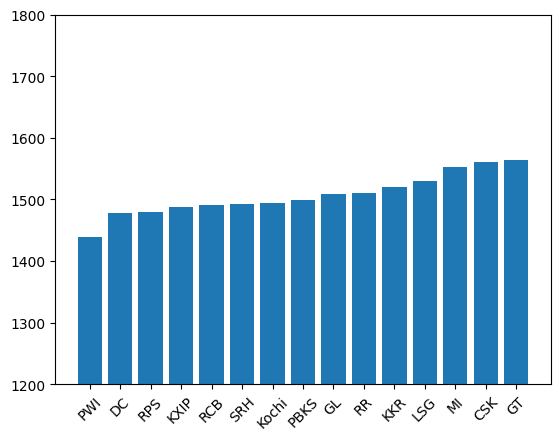

In [28]:
plt.bar(mean_elos.home_team, mean_elos.elo_home_before)
plt.ylim(1200, 1800)
plt.xticks(rotation=45)
plt.show()

In [29]:
proc_df.head()

,season,home_team,away_team,toss_won,decision,venue_id,output,elo_home_before,elo_away_before,home_team_avg_runs_scored_last_5,home_team_avg_runs_conceded_last_5,home_team_win_ratio_last_5,home_team_avg_run_rate_last_5,home_team_avg_bowl_econ_last_5,home_team_avg_boundaries_scored_last_5,home_team_avg_boundaries_conceded_last_5,away_team_avg_runs_scored_last_5,away_team_avg_runs_conceded_last_5,away_team_win_ratio_last_5,away_team_avg_run_rate_last_5,away_team_avg_bowl_econ_last_5,away_team_avg_boundaries_scored_last_5,away_team_avg_boundaries_conceded_last_5
974,2008.0,KXIP,CSK,CSK,BAT FIRST,57991,0,1500.000000,1500.000000,0.00,0.00,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
987,2008.0,RCB,CSK,CSK,BAT FIRST,57897,0,1490.551379,1529.425240,108.50,180.00,0.0,6.090232,9.585088,12.5,26.5,207.000000,240.000000,0.000000,10.350000,12.000000,27.000000,36.000000
996,2008.0,RR,CSK,CSK,BAT FIRST,58162,1,1528.585215,1527.721767,182.00,158.50,1.0,9.540884,8.102880,25.5,19.5,186.000000,209.000000,0.000000,9.427577,10.450000,23.000000,30.500000
1000,2008.0,DC,CSK,CSK,BOWL FIRST,58040,0,1516.787369,1506.154259,161.50,155.00,1.0,9.145861,7.750000,22.5,20.0,160.666667,175.666667,0.333333,8.867211,8.878947,19.333333,24.666667
1008,2008.0,MI,CSK,MI,BOWL FIRST,58324,1,1494.923866,1526.809764,146.25,139.25,0.5,7.734354,8.755145,18.5,17.5,167.250000,178.750000,0.250000,8.987908,9.009211,20.750000,24.750000


In [30]:
proc_df.season.unique()

array([2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2018.,
       2019., 2020., 2021., 2022., 2023.,   nan, 2016., 2017.])

### Handle N/A s

In [31]:

proc_df.isna().sum()

season                                      3
home_team                                   0
away_team                                   0
toss_won                                    3
decision                                    3
venue_id                                    0
output                                      0
elo_home_before                             0
elo_away_before                             0
home_team_avg_runs_scored_last_5            0
home_team_avg_runs_conceded_last_5          0
home_team_win_ratio_last_5                  0
home_team_avg_run_rate_last_5               0
home_team_avg_bowl_econ_last_5              0
home_team_avg_boundaries_scored_last_5      0
home_team_avg_boundaries_conceded_last_5    0
away_team_avg_runs_scored_last_5            0
away_team_avg_runs_conceded_last_5          0
away_team_win_ratio_last_5                  0
away_team_avg_run_rate_last_5               0
away_team_avg_bowl_econ_last_5              0
away_team_avg_boundaries_scored_la

In [32]:

season_min = proc_df.season.min()
proc_df['season'] = proc_df.season.fillna(season_min)

In [33]:
proc_df['toss_won'] = proc_df.toss_won.fillna('')
proc_df['decision'] = proc_df.decision.fillna('')

In [34]:
proc_df.isna().sum()

season                                      0
home_team                                   0
away_team                                   0
toss_won                                    0
decision                                    0
venue_id                                    0
output                                      0
elo_home_before                             0
elo_away_before                             0
home_team_avg_runs_scored_last_5            0
home_team_avg_runs_conceded_last_5          0
home_team_win_ratio_last_5                  0
home_team_avg_run_rate_last_5               0
home_team_avg_bowl_econ_last_5              0
home_team_avg_boundaries_scored_last_5      0
home_team_avg_boundaries_conceded_last_5    0
away_team_avg_runs_scored_last_5            0
away_team_avg_runs_conceded_last_5          0
away_team_win_ratio_last_5                  0
away_team_avg_run_rate_last_5               0
away_team_avg_bowl_econ_last_5              0
away_team_avg_boundaries_scored_la

### Split / Shuffle Data for validation and testing. 

In [35]:
from sklearn.model_selection import train_test_split

In [63]:
# Since it needs to be a time aware split, shuffle=False .. which results in past matches only for training and future matches for predicting.
df_full_train, df_test = train_test_split(proc_df, test_size=.2, shuffle=False, random_state=21)
df_train, df_val = train_test_split(df_full_train, test_size=20/80, shuffle=False, random_state=21)
len(df_train),  len(df_val), len(df_test)

(618, 207, 207)

In [37]:
df_train.head()

,season,home_team,away_team,toss_won,decision,venue_id,output,elo_home_before,elo_away_before,home_team_avg_runs_scored_last_5,home_team_avg_runs_conceded_last_5,home_team_win_ratio_last_5,home_team_avg_run_rate_last_5,home_team_avg_bowl_econ_last_5,home_team_avg_boundaries_scored_last_5,home_team_avg_boundaries_conceded_last_5,away_team_avg_runs_scored_last_5,away_team_avg_runs_conceded_last_5,away_team_win_ratio_last_5,away_team_avg_run_rate_last_5,away_team_avg_bowl_econ_last_5,away_team_avg_boundaries_scored_last_5,away_team_avg_boundaries_conceded_last_5
974,2008.0,KXIP,CSK,CSK,BAT FIRST,57991,0,1500.000000,1500.000000,0.00,0.00,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
987,2008.0,RCB,CSK,CSK,BAT FIRST,57897,0,1490.551379,1529.425240,108.50,180.00,0.0,6.090232,9.585088,12.5,26.5,207.000000,240.000000,0.000000,10.350000,12.000000,27.000000,36.000000
996,2008.0,RR,CSK,CSK,BAT FIRST,58162,1,1528.585215,1527.721767,182.00,158.50,1.0,9.540884,8.102880,25.5,19.5,186.000000,209.000000,0.000000,9.427577,10.450000,23.000000,30.500000
1000,2008.0,DC,CSK,CSK,BOWL FIRST,58040,0,1516.787369,1506.154259,161.50,155.00,1.0,9.145861,7.750000,22.5,20.0,160.666667,175.666667,0.333333,8.867211,8.878947,19.333333,24.666667
1008,2008.0,MI,CSK,MI,BOWL FIRST,58324,1,1494.923866,1526.809764,146.25,139.25,0.5,7.734354,8.755145,18.5,17.5,167.250000,178.750000,0.250000,8.987908,9.009211,20.750000,24.750000


In [38]:
y_train = df_train.pop('output')
y_val = df_val.pop('output')
y_test = df_test.pop('output')
y_train.head()

974     0
987     0
996     1
1000    0
1008    1
Name: output, dtype: int64

In [39]:
df_full_train.dtypes

season                                      float64
home_team                                    object
away_team                                    object
toss_won                                     object
decision                                     object
venue_id                                      int64
output                                        int64
elo_home_before                             float64
elo_away_before                             float64
home_team_avg_runs_scored_last_5            float64
home_team_avg_runs_conceded_last_5          float64
home_team_win_ratio_last_5                  float64
home_team_avg_run_rate_last_5               float64
home_team_avg_bowl_econ_last_5              float64
home_team_avg_boundaries_scored_last_5      float64
home_team_avg_boundaries_conceded_last_5    float64
away_team_avg_runs_scored_last_5            float64
away_team_avg_runs_conceded_last_5          float64
away_team_win_ratio_last_5                  float64
away_team_av

In [40]:
cat_cols = ['home_team', 'away_team', 'toss_won', 'decision']
num_cols = list(set(df_train.columns) - set(cat_cols))

In [41]:
num_cols

['home_team_avg_runs_conceded_last_5',
 'away_team_avg_runs_conceded_last_5',
 'home_team_avg_boundaries_conceded_last_5',
 'venue_id',
 'season',
 'away_team_avg_run_rate_last_5',
 'home_team_avg_run_rate_last_5',
 'home_team_avg_boundaries_scored_last_5',
 'away_team_avg_boundaries_scored_last_5',
 'elo_away_before',
 'elo_home_before',
 'home_team_avg_runs_scored_last_5',
 'away_team_avg_runs_scored_last_5',
 'away_team_avg_bowl_econ_last_5',
 'home_team_avg_bowl_econ_last_5',
 'away_team_win_ratio_last_5',
 'away_team_avg_boundaries_conceded_last_5',
 'home_team_win_ratio_last_5']

In [42]:
df_full_train.home_team.value_counts()

home_team
SRH      110
DC        98
RCB       97
CSK       96
MI        92
KKR       86
RR        84
KXIP      73
PWI       18
PBKS      15
LSG       14
GT        13
GL        12
RPS       12
Kochi      5
Name: count, dtype: int64

In [43]:
df_full_train.decision.value_counts()

decision
BOWL FIRST    530
BAT FIRST     289
                3
no toss         3
Name: count, dtype: int64

In [44]:
# Home team win rate

home_team_win_rate = df_full_train.output.mean()
home_team_win_rate

np.float64(0.5163636363636364)

In [45]:
# Home team win rate w.r.t toss decision
bowl_first_wins = df_full_train[df_full_train.decision == 'BOWL FIRST'].output.mean()
bat_first_wins = df_full_train[df_full_train.decision == 'BAT FIRST'].output.mean()

bowl_first_wins, bat_first_wins

(np.float64(0.5056603773584906), np.float64(0.5432525951557093))

In [46]:
# Home team win rate w.r.t toss wins  
df_full_train[df_full_train.toss_won == df_full_train.home_team].output.mean()

np.float64(0.5358024691358024)

In [47]:
# Home team win rate w.r.t toss decision  
bowl_first_wins = df_full_train[df_full_train.decision == 'BOWL FIRST'].output.mean()
bat_first_wins = df_full_train[df_full_train.decision == 'BAT FIRST'].output.mean()

bowl_first_wins, bat_first_wins

(np.float64(0.5056603773584906), np.float64(0.5432525951557093))

In [48]:
from IPython.display import display

for c in cat_cols:
    print(c)
    df_group = df_full_train.groupby(c).output.agg(['mean', 'count'])
    df_group['diff'] = home_team_win_rate - df_group['mean']
    df_group['risk'] = df_group['mean'] / home_team_win_rate
    display(df_group)
    print()
    print()

home_team


,mean,count,diff,risk
home_team,,,,
CSK,0.625000,96,-0.108636,1.210387
DC,0.489796,98,0.026568,0.948548
GL,0.416667,12,0.099697,0.806925
GT,0.615385,13,-0.099021,1.191766
KKR,0.488372,86,0.027992,0.945791
KXIP,0.506849,73,0.009514,0.981574
Kochi,0.400000,5,0.116364,0.774648
LSG,0.428571,14,0.087792,0.829980
MI,0.576087,92,-0.059723,1.115661




away_team


,mean,count,diff,risk
away_team,,,,
CSK,0.470588,102,0.045775,0.911350
DC,0.608696,115,-0.092332,1.178812
GL,0.466667,15,0.049697,0.903756
GT,0.266667,15,0.249697,0.516432
KKR,0.528000,125,-0.011636,1.022535
KXIP,0.577320,97,-0.060956,1.118048
Kochi,0.571429,7,-0.055065,1.106640
LSG,0.285714,14,0.230649,0.553320
MI,0.449612,129,0.066751,0.870728




toss_won


,mean,count,diff,risk
toss_won,,,,
,0.333333,3,0.183030,0.645540
CSK,0.542857,105,-0.026494,1.051308
DC,0.557522,113,-0.041158,1.079708
GL,0.266667,15,0.249697,0.516432
GT,0.352941,17,0.163422,0.683513
KKR,0.514019,107,0.002345,0.995459
KXIP,0.552941,85,-0.036578,1.070837
Kochi,0.500000,6,0.016364,0.968310
LSG,0.500000,10,0.016364,0.968310




decision


,mean,count,diff,risk
decision,,,,
,0.333333,3,0.183030,0.645540
BAT FIRST,0.543253,289,-0.026889,1.052074
BOWL FIRST,0.505660,530,0.010703,0.979272
no toss,0.000000,3,0.516364,0.000000


In [49]:
from sklearn.metrics import mutual_info_score

In [50]:
mutual_info_score(df_full_train.toss_won, df_full_train.output)

np.float64(0.011412760216100281)

In [51]:
def mi_score_against_churn(series_col):
    return mutual_info_score(series_col, df_full_train.output)

In [52]:
mi_scores = df_full_train[cat_cols].apply(mi_score_against_churn)
mi_scores

home_team    0.010461
away_team    0.012788
toss_won     0.011413
decision     0.003544
dtype: float64

### Correlation coefficient for numeric columns

In [53]:
corr_scores = df_full_train[num_cols].corrwith(df_full_train.output)
corr_scores.sort_values()

venue_id                                   -0.084251
season                                     -0.041367
elo_away_before                            -0.036864
away_team_avg_boundaries_conceded_last_5   -0.032768
home_team_avg_boundaries_conceded_last_5   -0.029273
away_team_avg_runs_conceded_last_5         -0.024797
home_team_avg_bowl_econ_last_5             -0.022727
away_team_avg_boundaries_scored_last_5     -0.022388
away_team_avg_run_rate_last_5              -0.017706
home_team_avg_runs_conceded_last_5         -0.017391
away_team_win_ratio_last_5                 -0.013334
away_team_avg_bowl_econ_last_5             -0.005234
home_team_avg_run_rate_last_5              -0.004885
away_team_avg_runs_scored_last_5           -0.003948
home_team_avg_boundaries_scored_last_5      0.012656
home_team_avg_runs_scored_last_5            0.018537
home_team_win_ratio_last_5                  0.024152
elo_home_before                             0.041671
dtype: float64

In [54]:
##  Train Logistic Regression 

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler

In [56]:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

X_train.shape, X_val.shape

((618, 62), (207, 62))

In [57]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)

In [58]:
model = LogisticRegression(random_state=21, max_iter=1000)
model.fit(X_train, y_train)

/Users/sethurama/.local/share/virtualenvs/ipl_note-eCV60-iz/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=21)

In [59]:
# help(LogisticRegression)

In [60]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred[:5]

array([0.57015755, 0.37513922, 0.41529286, 0.43278203, 0.54837439])

In [61]:
win_pred = (y_pred >= 0.5).astype(int)
win_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1])

In [62]:
(win_pred == y_val).mean()

np.float64(0.5700483091787439)